In [215]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [216]:
def plot_cost(hist):
    plt.plot(range(0, len(hist)), hist, label='Cost Function')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function vs. Number of Iterations')

    plt.legend()

    plt.show()

def plot_model(x, y, X, model_w, model_b):
    plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Model")
    plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show() 

In [217]:
def y_hat(Xi, w, b):
    return np.dot(Xi, w) + b

In [218]:
def regularized_cost(X, y, w, b, lambda_=0):
    m, n = np.shape(X)

    return (sum([((np.dot(X[i], w) + b) - y[i])**2 for i in range(m)])/(2*m)) + ((sum([wj**2 for wj in w])*lambda_)/(2*m))

In [219]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = regularized_cost(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


In [220]:
def get_partials(X, y, w, b, lambda_=0):
    m, n = np.shape(X)
    dw = np.zeros(n)
    for j in range(n):
        dw[j] = (sum([(((np.dot(X[i], w) + b) - y[i]) * X[i][j]) for i in range(m)]) + lambda_*w[j])/m
    db = sum([(np.dot(X[i], w) + b) - y[i] for i in range(m)])/m
    return dw, db

In [221]:
def gradient_descent(X, y, iter, alpha, lambda_=0):
    n = len(X[0])
    w = np.zeros(n)
    b = 0
    hist = np.array([])
    for i in range(iter):
        dw, db = get_partials(X, y, w, b, lambda_)
        w = w - alpha * dw
        b = b - alpha * db
        if i<100000: 
            hist = np.append(hist, regularized_cost(X, y, w, b))
    return w, b, hist

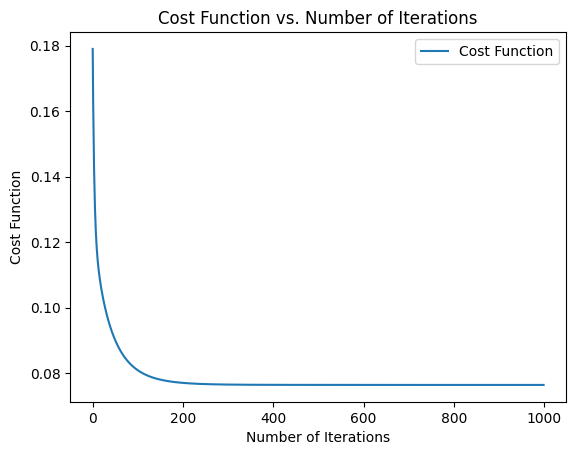

In [222]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
alpha = 0.1
lambda_ = 0.7
w, b, hist = gradient_descent(X_tmp, y_tmp, 1000, alpha, lambda_)
plot_cost(hist)